# COVID-19 Data Analysis Cases

In [2]:
# STEP 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('ggplot')
%matplotlib inline

# Load and Prepare the Data

In [4]:
# Load the dataset
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

# Fill missing province/state values
df['Province/State'] = df['Province/State'].fillna('National')

# Create a location identifier
df['Location'] = df.apply(lambda x: x['Country/Region'] if x['Province/State'] == 'National' 
                          else f"{x['Province/State']}, {x['Country/Region']}", axis=1)

# Calculate active cases
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# Verify the data
print("Data loaded successfully. First few rows:")
display(df.head())

Data loaded successfully. First few rows:


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Location
0,National,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Afghanistan
1,National,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,Albania
2,National,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,Algeria
3,National,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,Andorra
4,National,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,Angola


# Global Trends Analysis

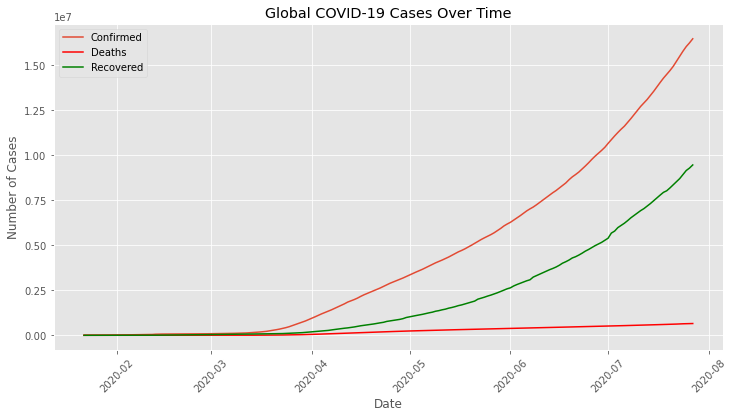

In [5]:
# Group by date for global totals
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plot global trends
plt.figure(figsize=(12,6))
plt.plot(global_trends.index, global_trends['Confirmed'], label='Confirmed')
plt.plot(global_trends.index, global_trends['Deaths'], label='Deaths', color='red')
plt.plot(global_trends.index, global_trends['Recovered'], label='Recovered', color='green')
plt.title('Global COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Country-Level Analysis

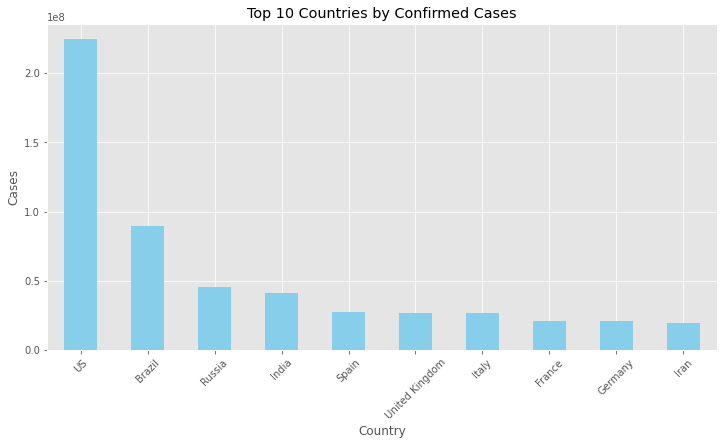

In [6]:
# Get top 10 affected countries
top_countries = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
top_countries = top_countries.sort_values('Confirmed', ascending=False).head(10)

# Plot top countries
plt.figure(figsize=(12,6))
top_countries['Confirmed'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()

# China-Specific Analysis

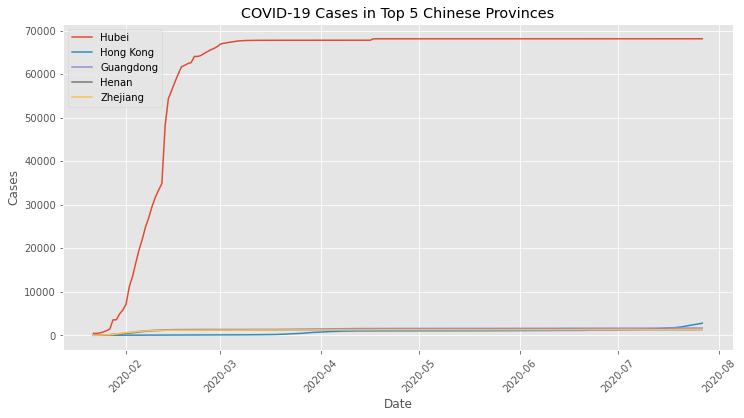

In [7]:
# Filter China data
china_data = df[df['Country/Region'] == 'China']

# Get top 5 affected provinces
top_provinces = china_data.groupby('Province/State')['Confirmed'].max().nlargest(5).index

# Plot province trends
plt.figure(figsize=(12,6))
for province in top_provinces:
    province_df = china_data[china_data['Province/State'] == province]
    plt.plot(province_df['Date'], province_df['Confirmed'], label=province)
    
plt.title('COVID-19 Cases in Top 5 Chinese Provinces')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Mortality and Recovery Rates

In [8]:
# Calculate rates for countries with at least 10 cases
country_rates = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
country_rates = country_rates[country_rates['Confirmed'] >= 10]  # Filter for significant cases

country_rates['Mortality Rate (%)'] = (country_rates['Deaths'] / country_rates['Confirmed'] * 100).round(2)
country_rates['Recovery Rate (%)'] = (country_rates['Recovered'] / country_rates['Confirmed'] * 100).round(2)

# Display sorted by mortality rate
print("Mortality and Recovery Rates by Country:")
display(country_rates.sort_values('Mortality Rate (%)', ascending=False)[['Mortality Rate (%)', 'Recovery Rate (%)']])

Mortality and Recovery Rates by Country:


,Mortality Rate (%),Recovery Rate (%)
Country/Region,,
Yemen,26.36,35.40
Belgium,15.34,25.91
United Kingdom,14.95,0.47
France,14.37,33.86
Italy,13.86,58.60
...,...,...
Saint Vincent and the Grenadines,0.00,72.00
Saint Lucia,0.00,83.18
Saint Kitts and Nevis,0.00,73.08


# Export Results

In [11]:
# STEP 7: Export Results (Corrected Version)
try:
    # Save cleaned data
    df.to_csv('covid_19_cleaned.csv', index=False)
    
    # Calculate GLOBAL totals (sum of all records)
    global_totals = df[['Confirmed', 'Deaths', 'Recovered']].sum()
    
    # Create summary statistics
    summary_stats = pd.DataFrame({
        'Total Confirmed': [int(global_totals['Confirmed'])],
        'Total Deaths': [int(global_totals['Deaths'])],
        'Total Recovered': [int(global_totals['Recovered'])],
        'Mortality Rate (%)': [(global_totals['Deaths'] / global_totals['Confirmed'] * 100).round(2)],
        'Recovery Rate (%)': [(global_totals['Recovered'] / global_totals['Confirmed'] * 100).round(2)]
    })
    
    # Save summary
    summary_stats.to_csv('covid_summary_stats.csv', index=False)
    
    print("Success! Results saved to:")
    print("- covid_19_cleaned.csv")
    print("- covid_summary_stats.csv")
    
    # Show preview
    print("\nSummary Statistics:")
    display(summary_stats)
    
except Exception as e:
    print(f"Error during export: {str(e)}")

Success! Results saved to:
- covid_19_cleaned.csv
- covid_summary_stats.csv

Summary Statistics:


,Total Confirmed,Total Deaths,Total Recovered,Mortality Rate (%),Recovery Rate (%)
0,828508482,43384903,388408229,5.24,46.88
